# Data visualization S2

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('s2_processed.csv')
df.head()

,ACC_x,ACC_y,ACC_z,BVP,EDA,TEMP,label
0,62.0,-21.0,107.0,-59.37,1.138257,35.41,0
1,51.0,16.0,35.0,43.50,1.125444,35.41,0
2,53.0,21.0,-6.0,53.56,1.011405,35.41,0
3,55.0,17.0,34.0,54.64,1.033188,35.41,0
4,48.0,24.0,15.0,-117.88,0.935807,35.41,0


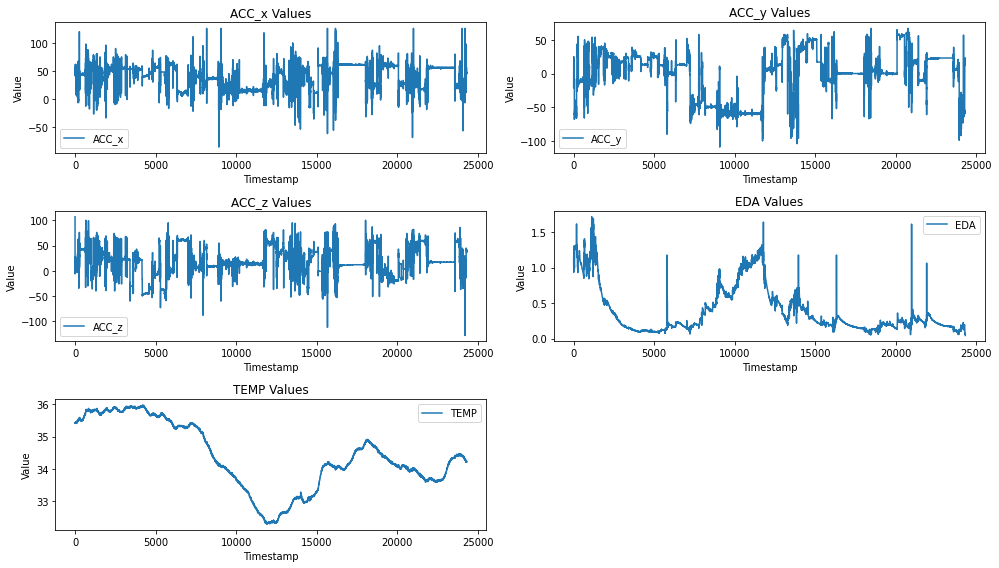

In [3]:
# Extract relevant columns
sensor_columns = ['ACC_x', 'ACC_y', 'ACC_z', 'EDA', 'TEMP']
label_column = 'label'

# Visualization 1: Plot values of each parameter
plt.figure(figsize=(14, 8))
for col in sensor_columns:
    plt.subplot(3, 2, sensor_columns.index(col) + 1)
    plt.plot(df.index, df[col], label=col)
    plt.title(f'{col} Values')
    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()
plt.show()

# Visualization 2: Plot values of each parameter with color differentiation for labels
# plt.figure(figsize=(12, 6))
# sns.set(style="whitegrid")
# for col in sensor_columns:
#     plt.subplot(2, 3, sensor_columns.index(col) + 1)
#     sns.scatterplot(data=df, x=col, y="label", hue=label_column, palette='viridis')
#     plt.title(f'{col} Values with Label Differentiation')
#     plt.xlabel('TImestamp')
#     plt.ylabel('Value')

# plt.tight_layout()
# plt.show()


In [17]:

# for label_value in sorted(df[label_column].unique()):
#     plt.figure(figsize=(14, 8))  # Create a new figure for each label
#     plt.title(f'Highlighted Segments for Label {label_value}')
#     for col in sensor_columns:
#         label_data = df[df[label_column] == label_value]
#         x = label_data.index
#         y = label_data[col]
#         plt.plot(x, y, label=f'{col} - Label {label_value}')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Value')
#     plt.legend()

# plt.tight_layout()
# plt.show()

In [24]:
# # Extract relevant columns
# sensor_columns = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'EDA', 'TEMP']
# label_column = 'label'

# # Define color map for labels
# label_colors = {
#     0: 'b',
#     1: 'g',
#     2: 'r',
#     3: 'c',
#     4: 'm',
#     5: 'y',
#     6: 'k',
#     7: 'orange',
# }

# # Create subplots for each sensor parameter
# plt.figure(figsize=(18, 12))
# handles = []  # To store legend handles
# for i, col in enumerate(sensor_columns):
#     plt.subplot(6, 1, i + 1)
#     for label, color in label_colors.items():
#         label_data = df[df[label_column] == label]
#         line, = plt.plot(label_data.index, label_data[col], color=color)
#         if i == 0:
#             handles.append(line)
#     plt.title(f'{col} Values with Label Differentiation')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Value')

# # Create a single legend for the entire subplot
# plt.legend(handles, [f'Label {label}' for label in label_colors.keys()])

# plt.tight_layout()
# plt.show()

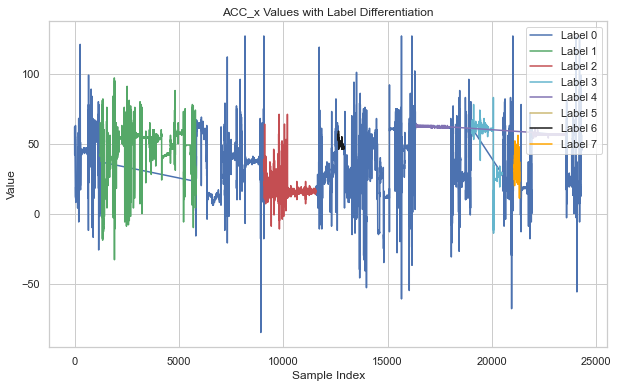

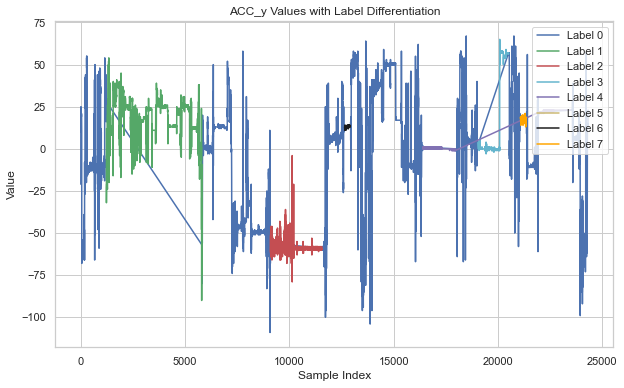

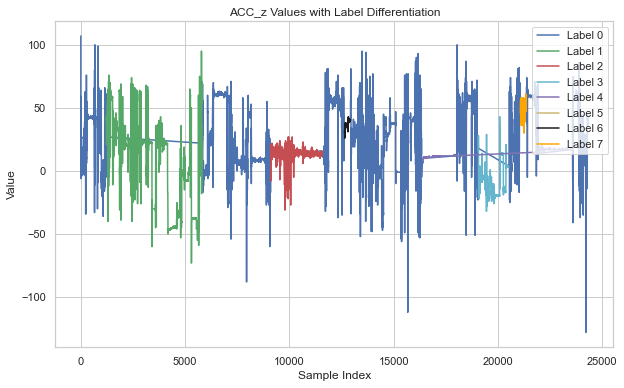

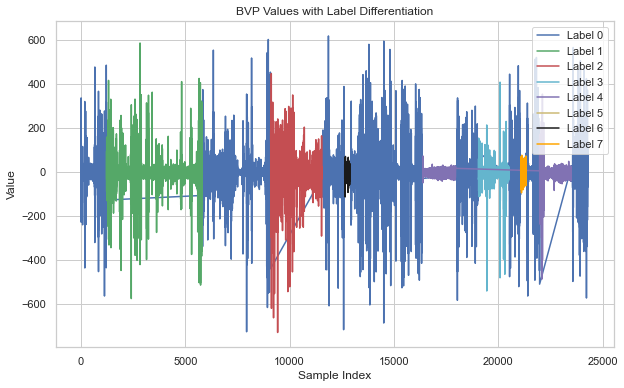

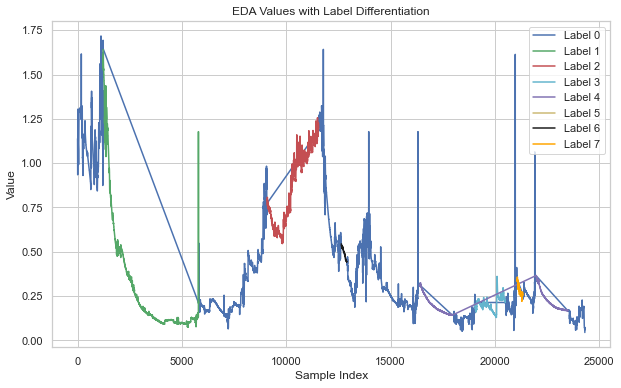

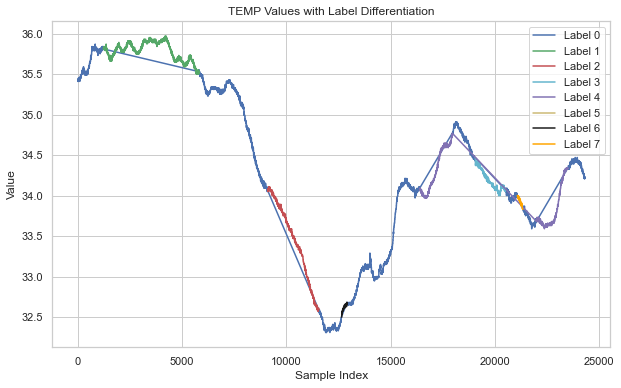

In [23]:
sensor_columns = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'EDA', 'TEMP']
label_column = 'label'

# Define color map for labels
label_colors = {
    0: 'b',
    1: 'g',
    2: 'r',
    3: 'c',
    4: 'm',
    5: 'y',
    6: 'k',
    7: 'orange',
}

# Create separate plots for each sensor parameter
for col in sensor_columns:
    plt.figure(figsize=(10, 6))
    for label, color in label_colors.items():
        label_data = df[df[label_column] == label]
        plt.plot(label_data.index, label_data[col], label=f'Label {label}', color=color)
    plt.title(f'{col} Values with Label Differentiation')
    plt.xlabel('Sample Index')
    plt.ylabel('Value')
    plt.legend(loc='upper right')  # Add a legend for each plot

plt.show()

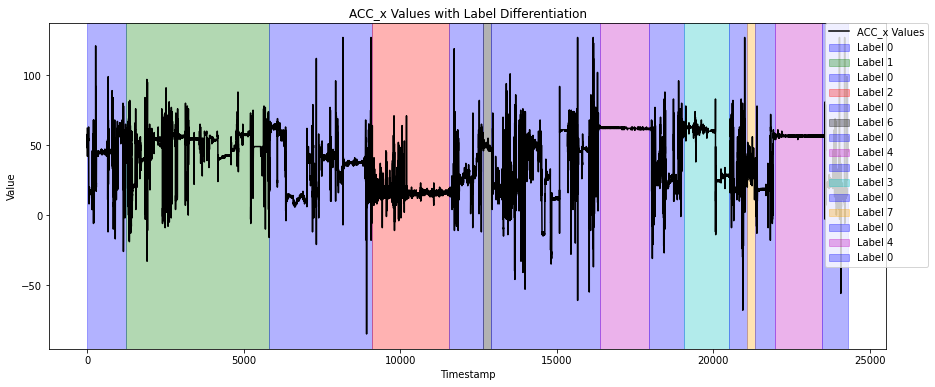

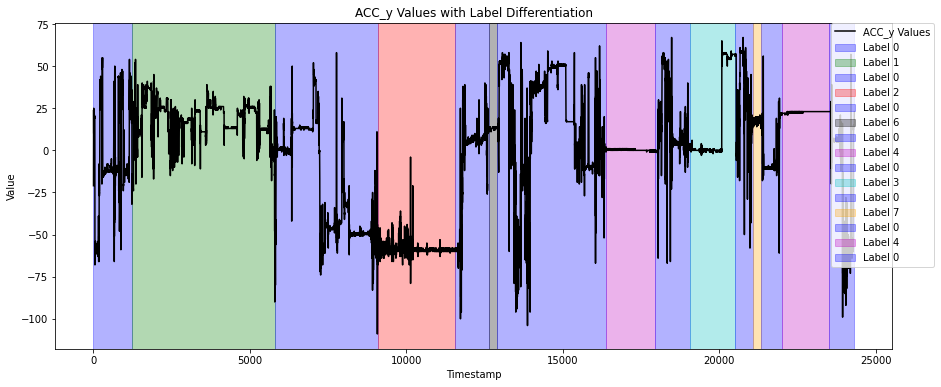

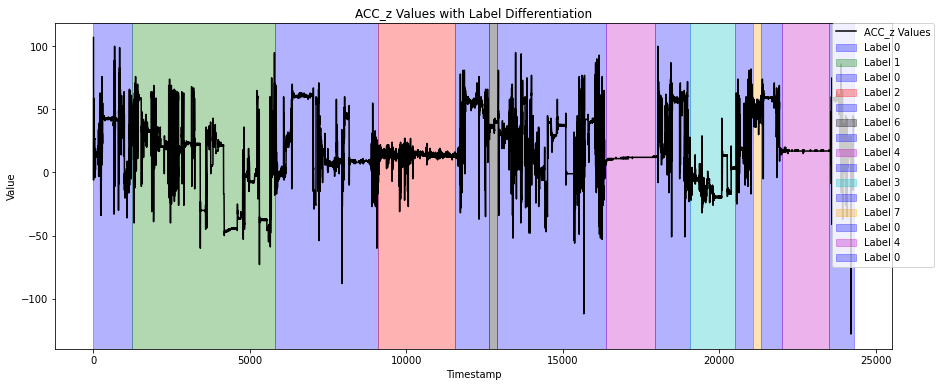

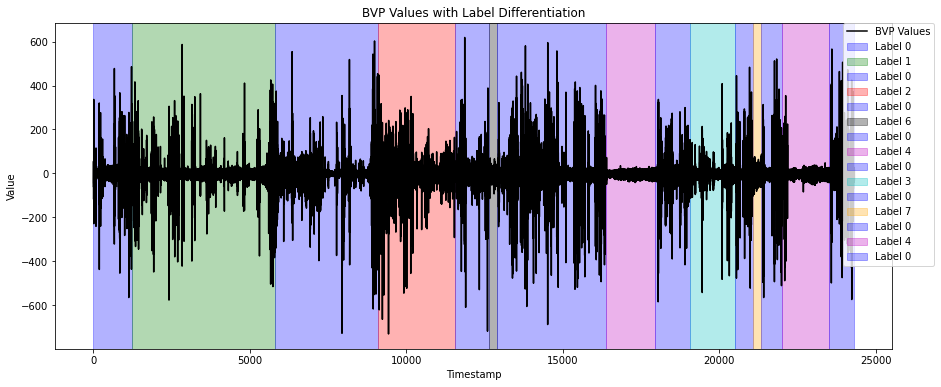

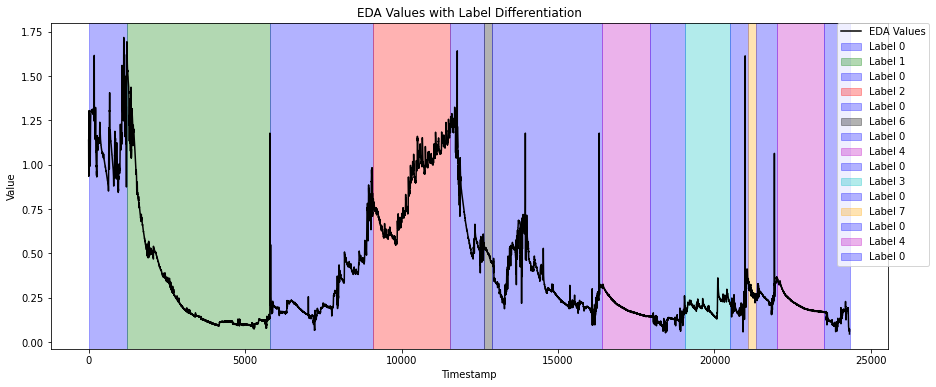

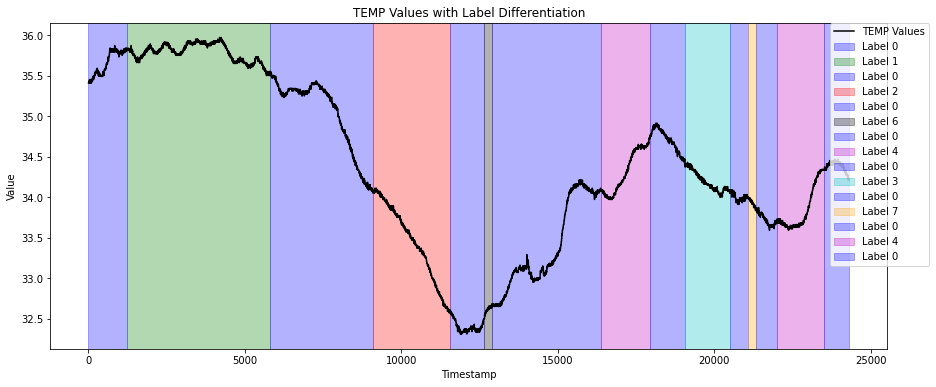

In [5]:
def highlight_plot(df):
    sensor_columns = ['ACC_x', 'ACC_y', 'ACC_z', 'BVP', 'EDA', 'TEMP']
    label_column = 'label'

    # Define color map for labels
    label_colors = {
        0: 'b',
        1: 'g',
        2: 'r',
        3: 'c',
        4: 'm',
        5: 'y',
        6: 'k',
        7: 'orange',
    }

    # Create separate plots for each sensor parameter
    for col in sensor_columns:
        plt.figure(figsize=(15, 6))
        plt.plot(df.index, df[col], label=f'{col} Values', color='k')  # Plot the sensor data in black
        
        # Initialize segment start and end points
        segment_start = None
        segment_color = None
        
        for idx, row in df.iterrows():
            if segment_start is None:
                segment_start = idx
                segment_color = label_colors.get(row[label_column], 'k')
            elif row[label_column] != df.at[idx - 1, label_column]:
                plt.axvspan(segment_start, idx, alpha=0.3, color=segment_color, label=f'Label {df.at[idx - 1, label_column]}')
                segment_start = idx
                segment_color = label_colors.get(row[label_column], 'k')
        plt.axvspan(segment_start, len(df), alpha=0.3, color=segment_color, label=f'Label {df.at[idx - 1, label_column]}')
        plt.title(f'{col} Values with Label Differentiation')
        plt.xlabel('Timestamp')
        plt.ylabel('Value')
        # plt.legend(loc='upper right')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
    # Add a legend for each plot

    plt.show()

highlight_plot(df)

In [3]:
# remove label with value more than 4
df_valid = df[df['label'] < 5]
#reset index
df_valid = df_valid.reset_index(drop=True)

df_valid.shape, df.shape

((23800, 7), (24316, 7))

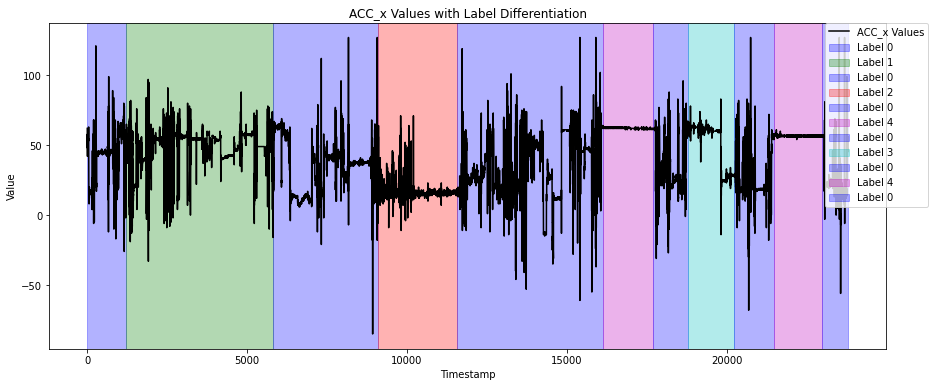

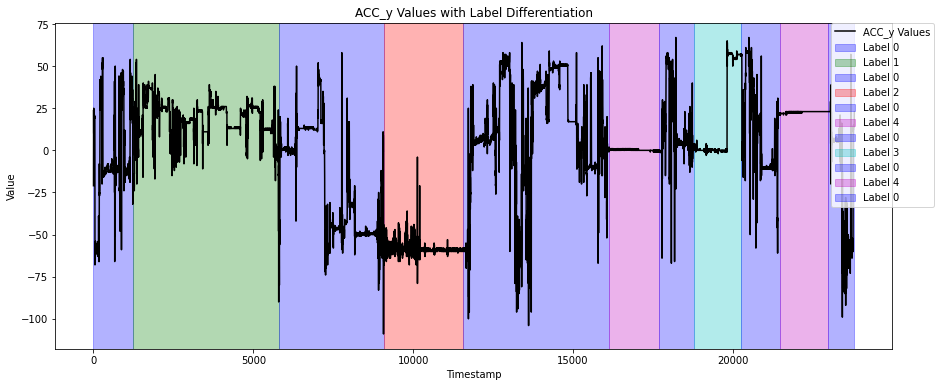

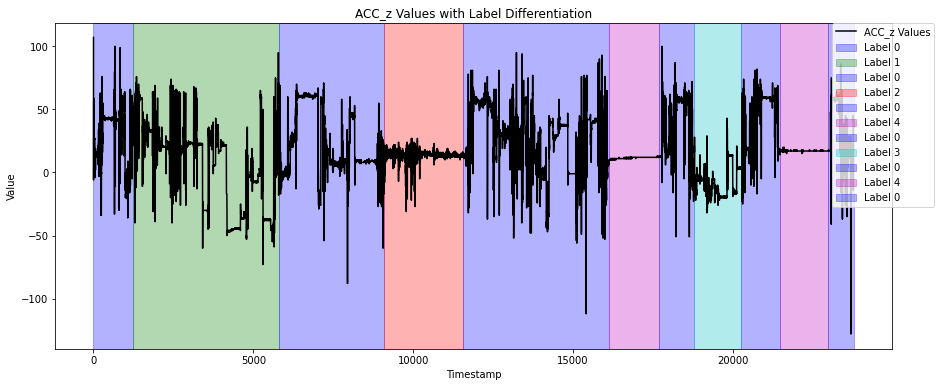

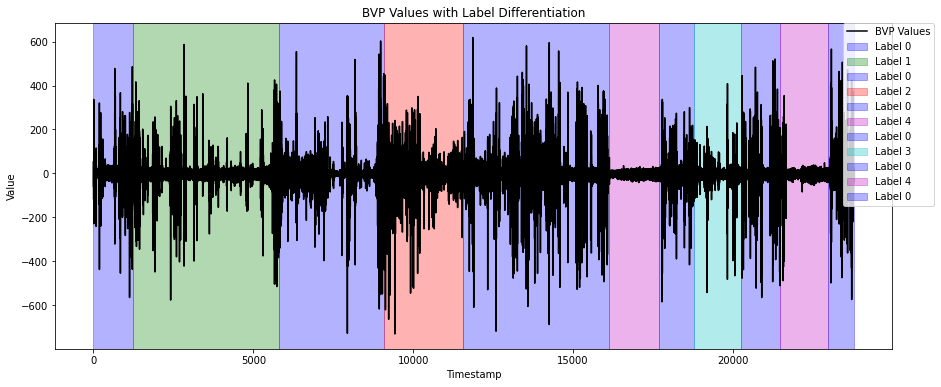

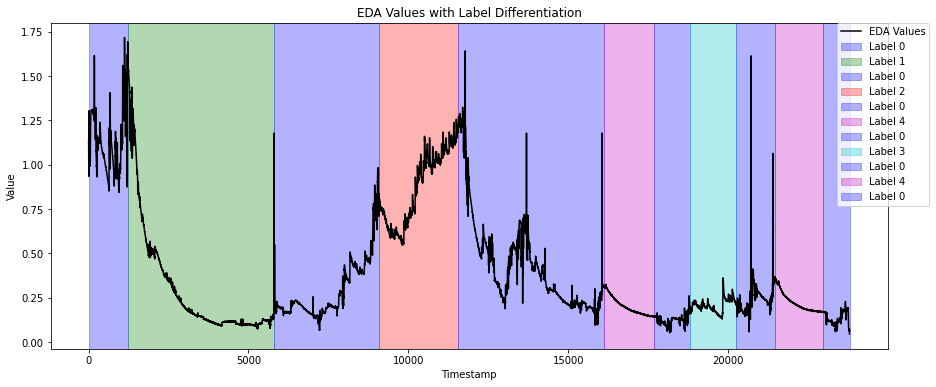

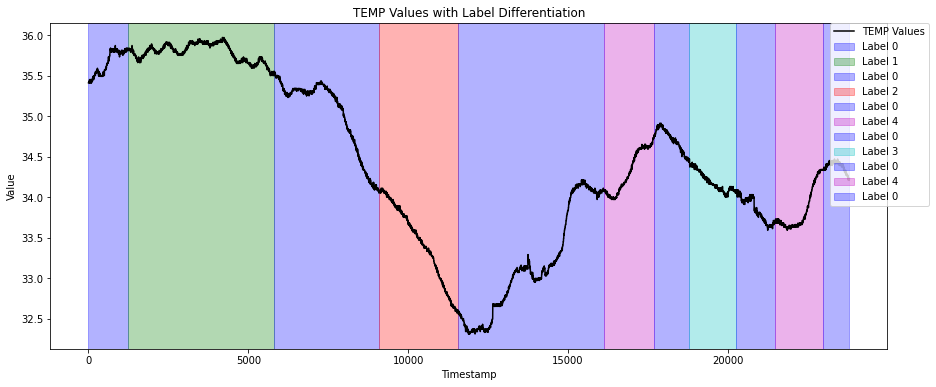

In [6]:
highlight_plot(df_valid)

In [42]:
df_valid.iloc[12902]

ACC_x     8.000000
ACC_y    51.000000
ACC_z    33.000000
BVP     -48.150000
EDA       0.265502
TEMP     32.680000
label     0.000000
Name: 13162, dtype: float64